# Initial codes

This notebook illustrates how Bayesian inference can be used to infer response rates of each group (basket) in a Basket trial.

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import sys
from os.path import exists

sys.path.append('..')
sys.path.append('.')

In [3]:
import numpy as np
import pandas as pd
import arviz as az

In [4]:
from pyBasket.env import Trial, TrueResponseSite
from pyBasket.common import DEFAULT_EFFICACY_CUTOFF, DEFAULT_FUTILITY_CUTOFF, MODEL_SIMPLE, MODEL_BHM, MODEL_LOGRES

In [5]:
DEBUG = True

In [6]:
num_burn_in = 5E3
num_posterior_samples = 5E3
num_chains = None # let pymc decide

In [7]:
if DEBUG:
    num_burn_in = 1E3
    num_posterior_samples = 1E3
    num_chains = 4

## Example 1: treatment is of interest in all groups

Same example as in [Berry et al. 2013](https://journals.sagepub.com/doi/full/10.1177/1740774513497539) (Figure 1).

4 groups are present in the trial, and all group response rates to the treatment are the same (0.3). The trial enrolls patients in 6 stages, first taking 10 patient for each group in the first stage, followed by 5 patients for each group in latter stages.

> The first example is a scenario in which responses are simulated assuming p = 30% in all four groups. This example illustrates the effect of borrowing across groups when all groups are similar, such as the smoothing of the observed response rates and a reduction in uncertainty.

### Generate data

In [8]:
K = 4    # the number of groups
p0 = 0.1 # null response rate
p1 = 0.3 # target response rate

true_response_rates = [p1, p1, p1, p1]
enrollment = [10, 5, 5, 5, 5, 5]
sites = [TrueResponseSite(k, true_response_rates[k], enrollment) for k in range(K)]

evaluate_interim = [True, True, True, True, True, True] # evaluate every interim stage
analysis_names = [MODEL_SIMPLE, MODEL_BHM]

In [9]:
futility_cutoff = DEFAULT_FUTILITY_CUTOFF
efficacy_cutoff = DEFAULT_EFFICACY_CUTOFF
early_futility_stop = False
early_efficacy_stop = False

In [10]:
trial = Trial(K, p0, p1, sites, evaluate_interim, 
              num_burn_in, num_posterior_samples, analysis_names, 
              futility_cutoff=futility_cutoff, efficacy_cutoff=efficacy_cutoff,
              early_futility_stop=early_futility_stop,
              early_efficacy_stop=early_efficacy_stop,              
              num_chains=num_chains)

done = trial.reset()
while not done:
    done = trial.step()


########## Stage=0 ##########

Registering Group 0 (OPEN): 2/10 for Analysis simple
Registering Group 0 (OPEN): 2/10 for Analysis bhm
Registering Group 1 (OPEN): 2/10 for Analysis simple
Registering Group 1 (OPEN): 2/10 for Analysis bhm
Registering Group 2 (OPEN): 5/10 for Analysis simple
Registering Group 2 (OPEN): 5/10 for Analysis bhm
Registering Group 3 (OPEN): 1/10 for Analysis simple
Registering Group 3 (OPEN): 1/10 for Analysis bhm

Clustering for simple
Clustering for bhm

Running inference for: simple


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 24 seconds.


,prob,futile,effective
k,,,
0,0.62875,False,False
1,0.62525,False,False
2,0.97225,False,True
3,0.41050,False,False


Running inference for: bhm


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z_alpha, mu_alpha, sigma_alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 24 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


,prob,futile,effective
k,,,
0,0.53350,False,False
1,0.52725,False,False
2,0.91825,False,True
3,0.34200,False,False



########## Stage=1 ##########

Registering Group 0 (OPEN): 5/15 for Analysis simple
Registering Group 0 (OPEN): 5/15 for Analysis bhm
Registering Group 1 (OPEN): 2/15 for Analysis simple
Registering Group 1 (OPEN): 2/15 for Analysis bhm
Registering Group 2 (OPEN): 8/15 for Analysis simple
Registering Group 2 (OPEN): 8/15 for Analysis bhm
Registering Group 3 (OPEN): 4/15 for Analysis simple
Registering Group 3 (OPEN): 4/15 for Analysis bhm

Clustering for simple
Clustering for bhm

Running inference for: simple


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.


,prob,futile,effective
k,,,
0,0.92600,False,True
1,0.50750,False,False
2,0.99775,False,True
3,0.82700,False,False


Running inference for: bhm


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z_alpha, mu_alpha, sigma_alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5735, but should be close to 0.95. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8777, but should be close to 0.95. Try to increase the number of tuning steps.


,prob,futile,effective
k,,,
0,0.88875,False,False
1,0.44250,False,False
2,0.99325,False,True
3,0.80200,False,False



########## Stage=2 ##########

Registering Group 0 (OPEN): 6/20 for Analysis simple
Registering Group 0 (OPEN): 6/20 for Analysis bhm
Registering Group 1 (OPEN): 2/20 for Analysis simple
Registering Group 1 (OPEN): 2/20 for Analysis bhm
Registering Group 2 (OPEN): 10/20 for Analysis simple
Registering Group 2 (OPEN): 10/20 for Analysis bhm
Registering Group 3 (OPEN): 6/20 for Analysis simple
Registering Group 3 (OPEN): 6/20 for Analysis bhm

Clustering for simple
Clustering for bhm

Running inference for: simple


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 24 seconds.


,prob,futile,effective
k,,,
0,0.89450,False,False
1,0.30725,False,False
2,0.99850,False,True
3,0.89575,False,False


Running inference for: bhm


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z_alpha, mu_alpha, sigma_alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.
The acceptance probability does not match the target. It is 0.8985, but should be close to 0.95. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9018, but should be close to 0.95. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


,prob,futile,effective
k,,,
0,0.87825,False,False
1,0.26550,False,False
2,0.99675,False,True
3,0.86675,False,False



########## Stage=3 ##########

Registering Group 0 (OPEN): 7/25 for Analysis simple
Registering Group 0 (OPEN): 7/25 for Analysis bhm
Registering Group 1 (OPEN): 4/25 for Analysis simple
Registering Group 1 (OPEN): 4/25 for Analysis bhm
Registering Group 2 (OPEN): 12/25 for Analysis simple
Registering Group 2 (OPEN): 12/25 for Analysis bhm
Registering Group 3 (OPEN): 7/25 for Analysis simple
Registering Group 3 (OPEN): 7/25 for Analysis bhm

Clustering for simple
Clustering for bhm

Running inference for: simple


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.


,prob,futile,effective
k,,,
0,0.89100,False,False
1,0.49900,False,False
2,0.99875,False,True
3,0.89250,False,False


Running inference for: bhm


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z_alpha, mu_alpha, sigma_alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8501, but should be close to 0.95. Try to increase the number of tuning steps.


,prob,futile,effective
k,,,
0,0.88075,False,False
1,0.52550,False,False
2,0.99625,False,True
3,0.87175,False,False



########## Stage=4 ##########

Registering Group 0 (OPEN): 8/30 for Analysis simple
Registering Group 0 (OPEN): 8/30 for Analysis bhm
Registering Group 1 (OPEN): 7/30 for Analysis simple
Registering Group 1 (OPEN): 7/30 for Analysis bhm
Registering Group 2 (OPEN): 15/30 for Analysis simple
Registering Group 2 (OPEN): 15/30 for Analysis bhm
Registering Group 3 (OPEN): 8/30 for Analysis simple
Registering Group 3 (OPEN): 8/30 for Analysis bhm

Clustering for simple
Clustering for bhm

Running inference for: simple


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.


,prob,futile,effective
k,,,
0,0.88875,False,False
1,0.80525,False,False
2,1.00000,False,True
3,0.88800,False,False


Running inference for: bhm


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z_alpha, mu_alpha, sigma_alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 24 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8796, but should be close to 0.95. Try to increase the number of tuning steps.


,prob,futile,effective
k,,,
0,0.88550,False,False
1,0.81875,False,False
2,0.99975,False,True
3,0.88600,False,False



########## Stage=5 ##########

Registering Group 0 (OPEN): 9/35 for Analysis simple
Registering Group 0 (OPEN): 9/35 for Analysis bhm
Registering Group 1 (OPEN): 8/35 for Analysis simple
Registering Group 1 (OPEN): 8/35 for Analysis bhm
Registering Group 2 (OPEN): 17/35 for Analysis simple
Registering Group 2 (OPEN): 17/35 for Analysis bhm
Registering Group 3 (OPEN): 9/35 for Analysis simple
Registering Group 3 (OPEN): 9/35 for Analysis bhm

Clustering for simple
Clustering for bhm

Running inference for: simple


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.


,prob,futile,effective
k,,,
0,0.99850,None,True
1,0.99675,None,True
2,1.00000,None,True
3,0.99975,None,True


Running inference for: bhm


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z_alpha, mu_alpha, sigma_alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.
There were 55 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7146, but should be close to 0.95. Try to increase the number of tuning steps.


,prob,futile,effective
k,,,
0,0.99925,None,True
1,0.99425,None,True
2,1.00000,None,True
3,0.99900,None,True


### Check last results

### Simple

In [11]:
analysis_name = analysis_names[0]
analysis_name

'simple'

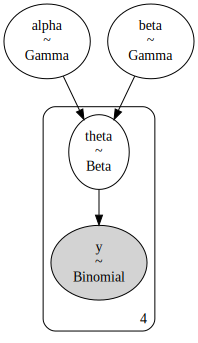

In [12]:
trial.visualise_model(analysis_name)

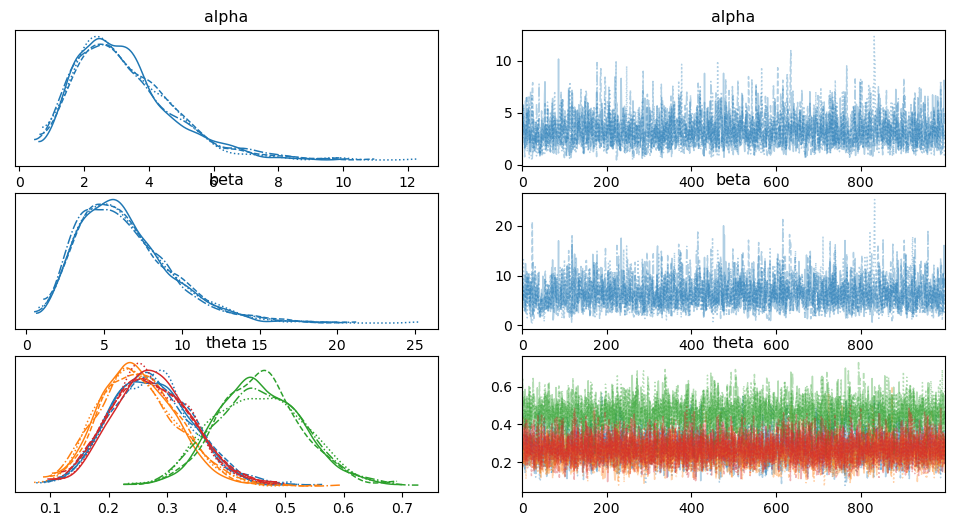

In [13]:
trial.plot_trace(analysis_name, -1)

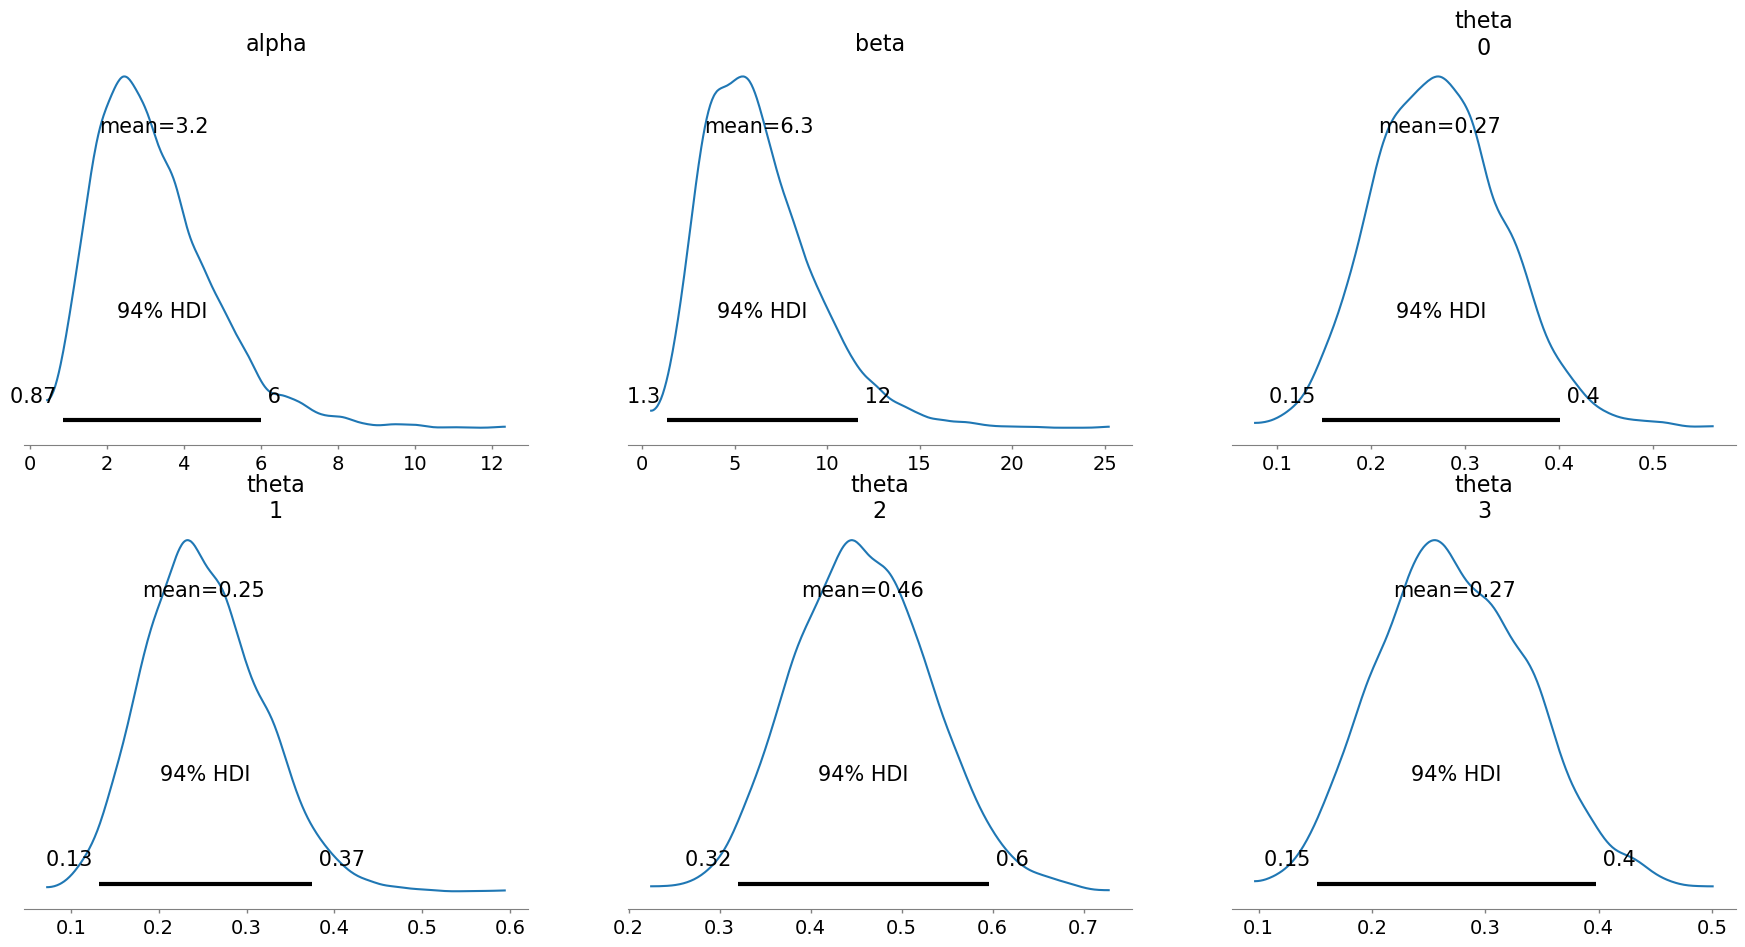

In [14]:
trial.plot_posterior(analysis_name, -1)

In [16]:
trial.final_report(analysis_name)

,status,nnz,total
k,,,
0,COMPLETED_EFFECTIVE,9,35
1,COMPLETED_EFFECTIVE,8,35
2,COMPLETED_EFFECTIVE,17,35
3,COMPLETED_EFFECTIVE,9,35


### BHM

In [17]:
analysis_name = analysis_names[1]
analysis_name

'bhm'

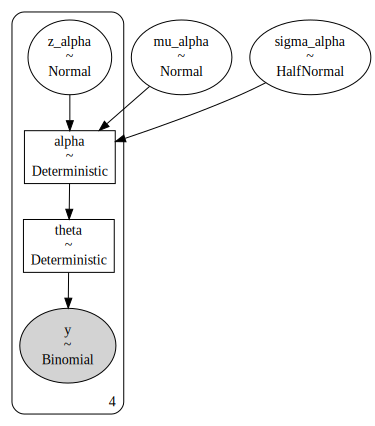

In [18]:
trial.visualise_model(analysis_name)

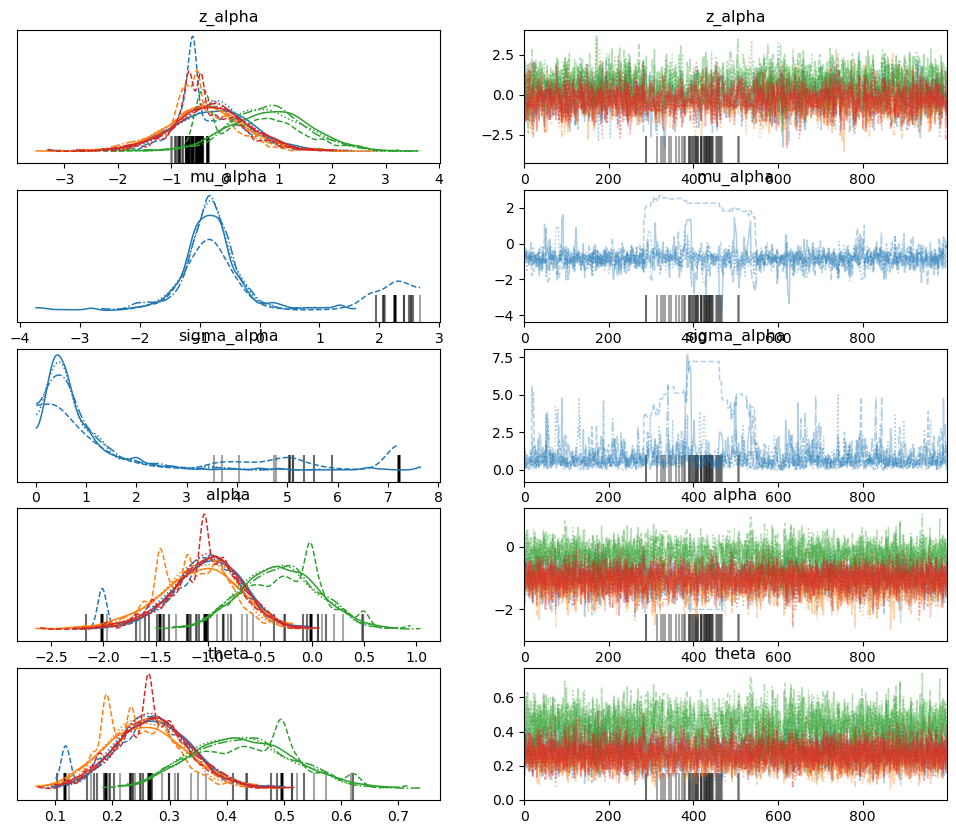

In [19]:
trial.plot_trace(analysis_name, -1)

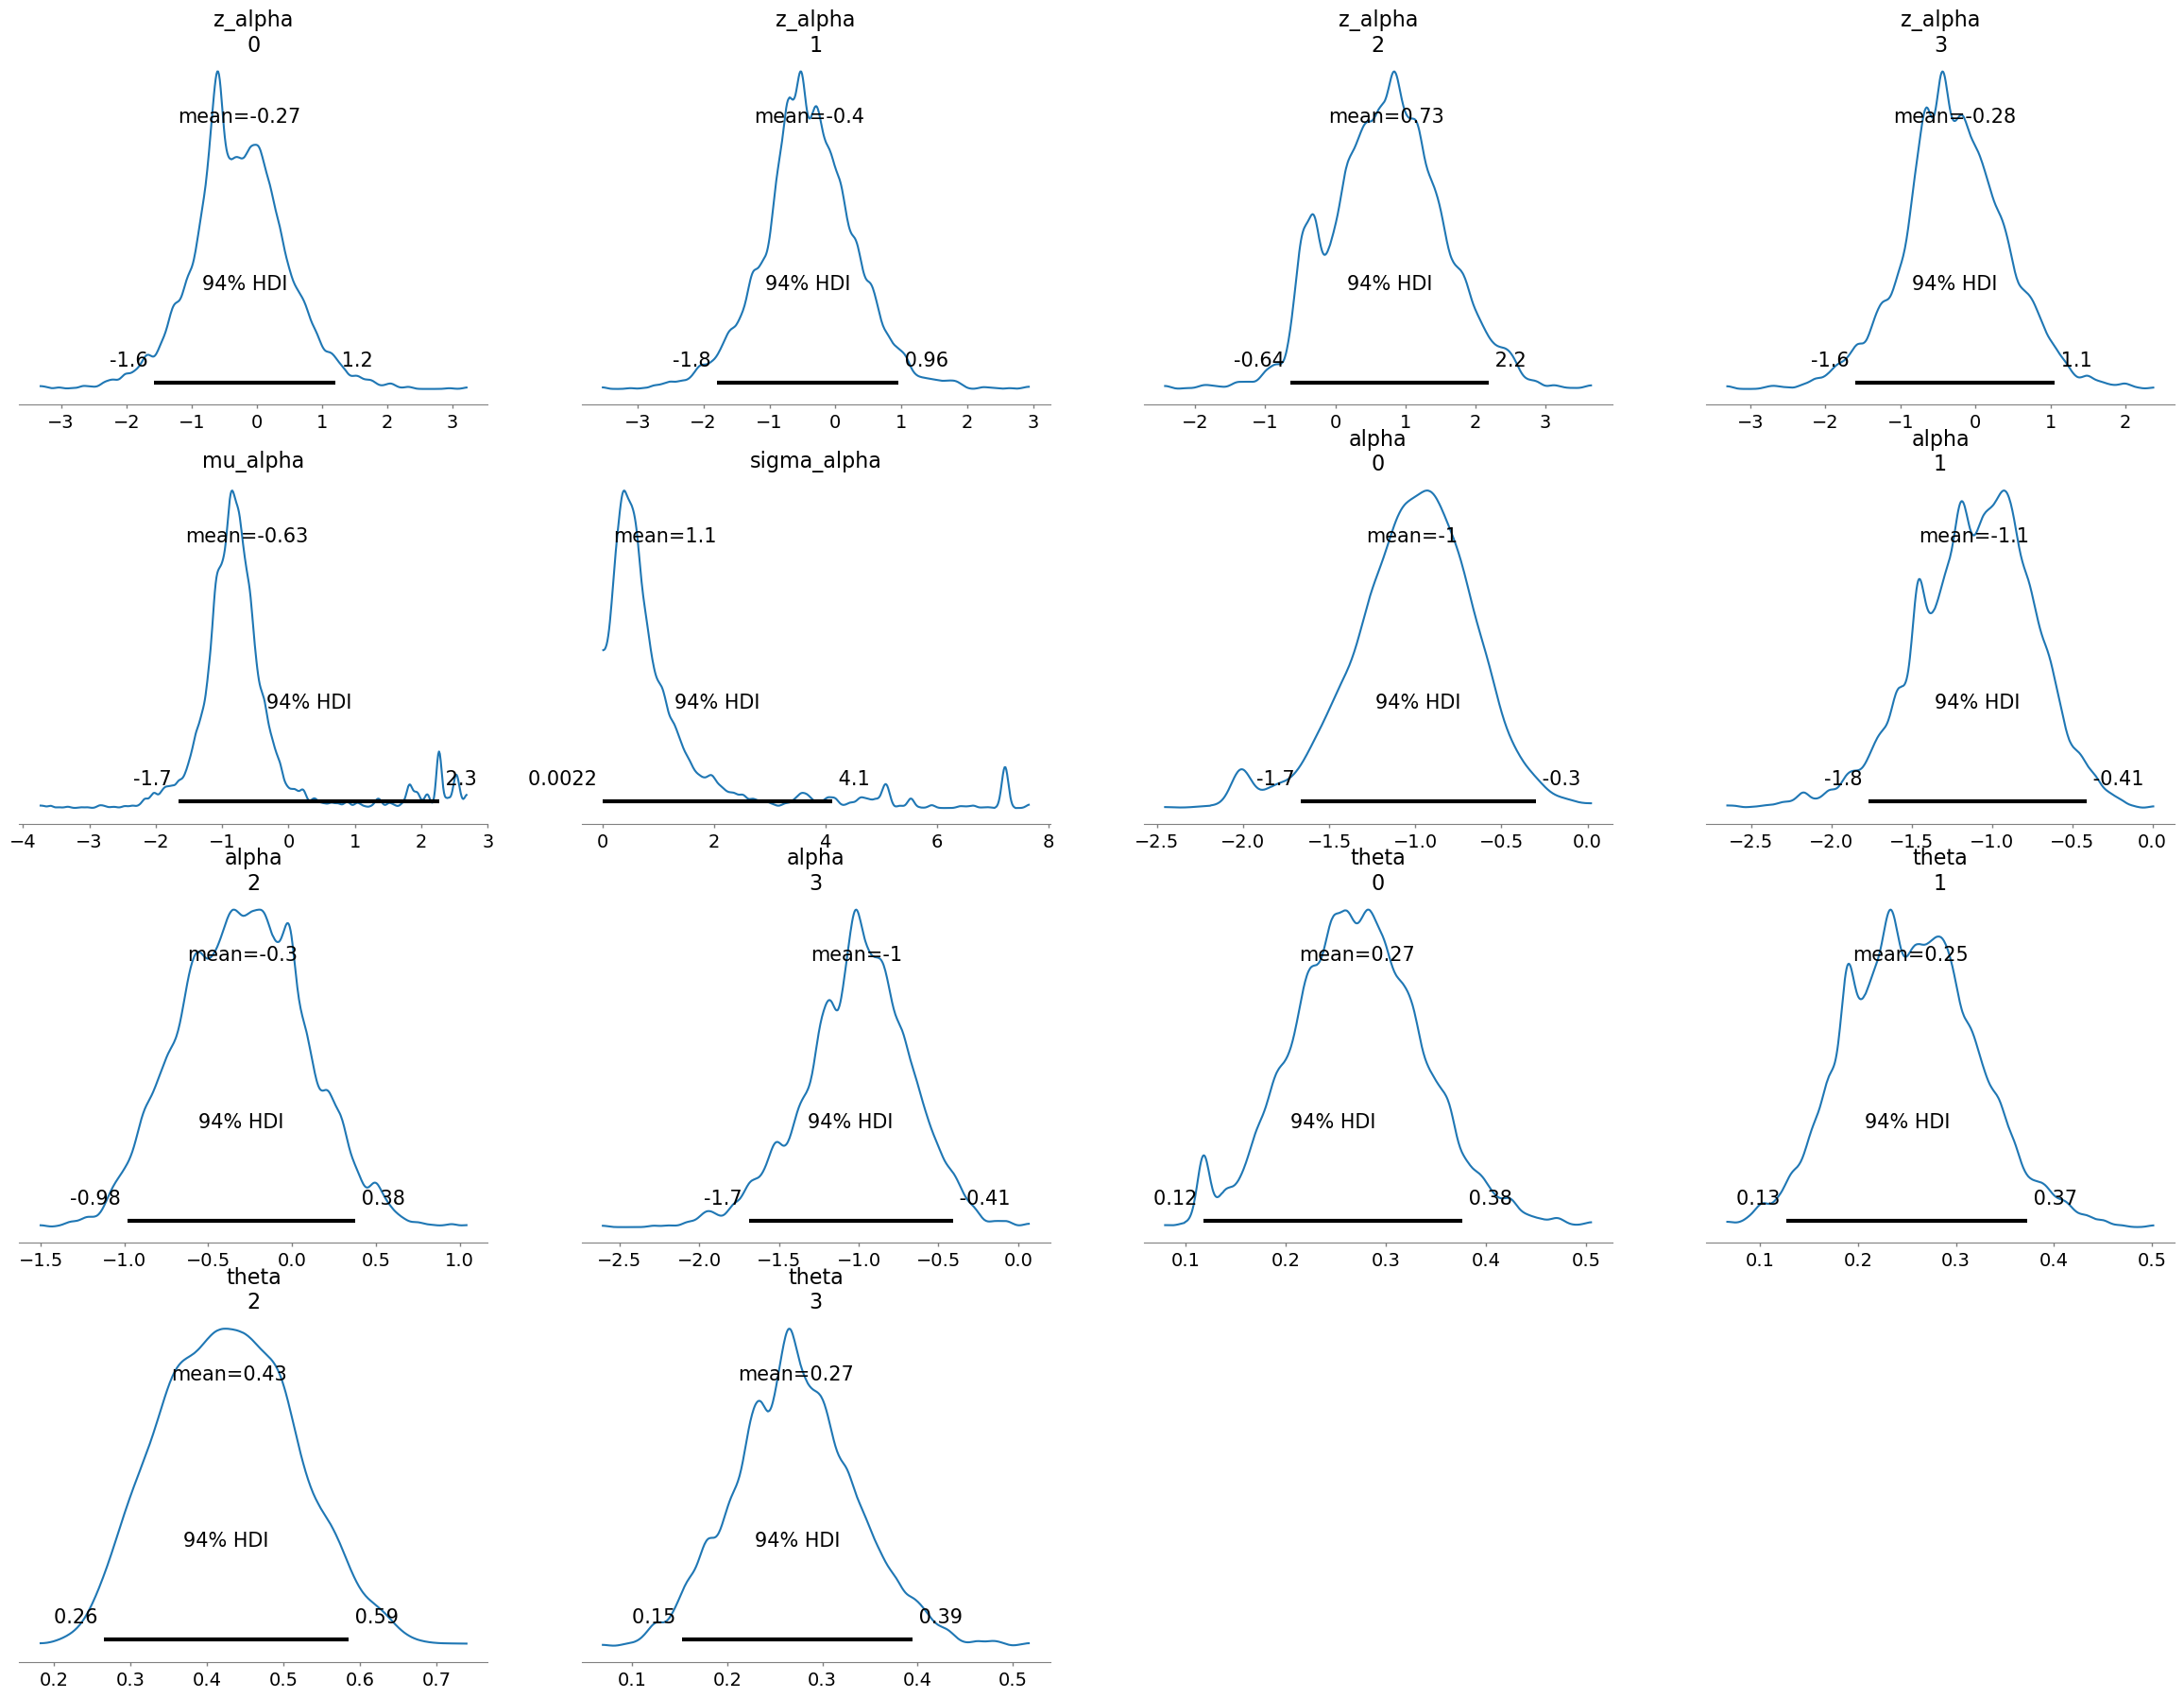

In [20]:
trial.plot_posterior(analysis_name, -1)

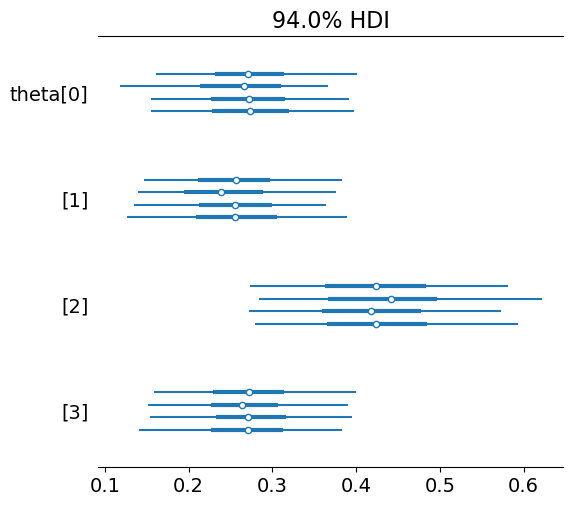

In [21]:
trial.plot_forest(analysis_name, -1)

In [22]:
trial.final_report(analysis_name)

,status,nnz,total
k,,,
0,COMPLETED_EFFECTIVE,9,35
1,COMPLETED_EFFECTIVE,8,35
2,COMPLETED_EFFECTIVE,17,35
3,COMPLETED_EFFECTIVE,9,35


## Example 2: treatment is of interest in only two groups

Same example as in [Berry et al. 2013](https://journals.sagepub.com/doi/full/10.1177/1740774513497539) (Figure 2).

4 groups are present in the group, with first two group responses = 0.10 and the other two groups = 0.3. The trial enrolls patients in 6 stages, first taking 10 patient for each group in the first stage, followed by 5 patients for each group in latter stages.

> The second example is from a scenario in which responses are simulated assuming p = 10% in two groups and p = 30% in two groups. This example illustrates the effect of borrowing, and that the harm is not great, when groups are dissimilar.

### Generate data

In [23]:
K = 4    # the number of groups
p0 = 0.1 # null response rate
p1 = 0.3 # target response rate

true_response_rates = [p0, p0, p1, p1]
enrollment = [10, 5, 5, 5, 5, 5]
sites = [TrueResponseSite(k, true_response_rates[k], enrollment) for k in range(K)]

evaluate_interim = [True, True, True, True, True, True] # evaluate every interim stage
analysis_names = [MODEL_SIMPLE, MODEL_BHM]

In [24]:
futility_cutoff = DEFAULT_FUTILITY_CUTOFF
efficacy_cutoff = DEFAULT_EFFICACY_CUTOFF
early_futility_stop = True
early_efficacy_stop = True

In [25]:
trial = Trial(K, p0, p1, sites, evaluate_interim, 
              num_burn_in, num_posterior_samples, analysis_names, 
              futility_cutoff=futility_cutoff, efficacy_cutoff=efficacy_cutoff,
              early_futility_stop=early_futility_stop,
              early_efficacy_stop=early_efficacy_stop,              
              num_chains=num_chains)

done = trial.reset()
while not done:
    done = trial.step()


########## Stage=0 ##########

Registering Group 0 (OPEN): 0/10 for Analysis simple
Registering Group 0 (OPEN): 0/10 for Analysis bhm
Registering Group 1 (OPEN): 0/10 for Analysis simple
Registering Group 1 (OPEN): 0/10 for Analysis bhm
Registering Group 2 (OPEN): 1/10 for Analysis simple
Registering Group 2 (OPEN): 1/10 for Analysis bhm
Registering Group 3 (OPEN): 5/10 for Analysis simple
Registering Group 3 (OPEN): 5/10 for Analysis bhm

Clustering for simple
Clustering for bhm

Running inference for: simple


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.


,prob,futile,effective
k,,,
0,0.06425,False,False
1,0.06375,False,False
2,0.19675,False,False
3,0.93850,False,True


Running inference for: bhm


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z_alpha, mu_alpha, sigma_alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.


,prob,futile,effective
k,,,
0,0.00900,True,False
1,0.00825,True,False
2,0.11650,False,False
3,0.96650,False,True



########## Stage=1 ##########

Registering Group 0 (OPEN): 1/15 for Analysis simple
Registering Group 0 (EARLY_STOP_FUTILE): 0/10 for Analysis bhm
Registering Group 1 (OPEN): 0/15 for Analysis simple
Registering Group 1 (EARLY_STOP_FUTILE): 0/10 for Analysis bhm
Registering Group 2 (OPEN): 1/15 for Analysis simple
Registering Group 2 (OPEN): 1/15 for Analysis bhm
Registering Group 3 (EARLY_STOP_EFFECTIVE): 5/10 for Analysis simple
Registering Group 3 (EARLY_STOP_EFFECTIVE): 5/10 for Analysis bhm

Clustering for simple
Clustering for bhm

Running inference for: simple


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.


,prob,futile,effective
k,,,
0,0.08875,False,False
1,0.02150,True,False
2,0.08425,False,False
3,0.93775,False,True


Running inference for: bhm


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z_alpha, mu_alpha, sigma_alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.


,prob,futile,effective
k,,,
0,0.00725,True,False
1,0.00775,True,False
2,0.03675,True,False
3,0.97225,False,True



########## Stage=2 ##########

Registering Group 0 (OPEN): 2/20 for Analysis simple
Registering Group 0 (EARLY_STOP_FUTILE): 0/10 for Analysis bhm
Registering Group 1 (EARLY_STOP_FUTILE): 0/15 for Analysis simple
Registering Group 1 (EARLY_STOP_FUTILE): 0/10 for Analysis bhm
Registering Group 2 (OPEN): 3/20 for Analysis simple
Registering Group 2 (EARLY_STOP_FUTILE): 1/15 for Analysis bhm
Registering Group 3 (EARLY_STOP_EFFECTIVE): 5/10 for Analysis simple
Registering Group 3 (EARLY_STOP_EFFECTIVE): 5/10 for Analysis bhm

Clustering for simple
Clustering for bhm

Running inference for: simple


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.


,prob,futile,effective
k,,,
0,0.15250,False,False
1,0.03575,True,False
2,0.31550,False,False
3,0.93925,False,True


Running inference for: bhm


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z_alpha, mu_alpha, sigma_alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 35 seconds.


,prob,futile,effective
k,,,
0,0.00475,True,False
1,0.00575,True,False
2,0.03850,True,False
3,0.96675,False,True



########## Stage=3 ##########

Registering Group 0 (OPEN): 3/25 for Analysis simple
Registering Group 0 (EARLY_STOP_FUTILE): 0/10 for Analysis bhm
Registering Group 1 (EARLY_STOP_FUTILE): 0/15 for Analysis simple
Registering Group 1 (EARLY_STOP_FUTILE): 0/10 for Analysis bhm
Registering Group 2 (OPEN): 5/25 for Analysis simple
Registering Group 2 (EARLY_STOP_FUTILE): 1/15 for Analysis bhm
Registering Group 3 (EARLY_STOP_EFFECTIVE): 5/10 for Analysis simple
Registering Group 3 (EARLY_STOP_EFFECTIVE): 5/10 for Analysis bhm

Clustering for simple
Clustering for bhm

Running inference for: simple


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.


,prob,futile,effective
k,,,
0,0.17850,False,False
1,0.04400,True,False
2,0.51400,False,False
3,0.95275,False,True


Running inference for: bhm


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z_alpha, mu_alpha, sigma_alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.


,prob,futile,effective
k,,,
0,0.01025,True,False
1,0.00875,True,False
2,0.03900,True,False
3,0.96375,False,True



########## Stage=4 ##########

Registering Group 0 (OPEN): 3/30 for Analysis simple
Registering Group 0 (EARLY_STOP_FUTILE): 0/10 for Analysis bhm
Registering Group 1 (EARLY_STOP_FUTILE): 0/15 for Analysis simple
Registering Group 1 (EARLY_STOP_FUTILE): 0/10 for Analysis bhm
Registering Group 2 (OPEN): 6/30 for Analysis simple
Registering Group 2 (EARLY_STOP_FUTILE): 1/15 for Analysis bhm
Registering Group 3 (EARLY_STOP_EFFECTIVE): 5/10 for Analysis simple
Registering Group 3 (EARLY_STOP_EFFECTIVE): 5/10 for Analysis bhm

Clustering for simple
Clustering for bhm

Running inference for: simple


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.


,prob,futile,effective
k,,,
0,0.09600,False,False
1,0.04025,True,False
2,0.48750,False,False
3,0.95125,False,True


Running inference for: bhm


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z_alpha, mu_alpha, sigma_alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.


,prob,futile,effective
k,,,
0,0.00675,True,False
1,0.00525,True,False
2,0.04200,True,False
3,0.95975,False,True



########## Stage=5 ##########

Registering Group 0 (OPEN): 3/35 for Analysis simple
Registering Group 0 (EARLY_STOP_FUTILE): 0/10 for Analysis bhm
Registering Group 1 (EARLY_STOP_FUTILE): 0/15 for Analysis simple
Registering Group 1 (EARLY_STOP_FUTILE): 0/10 for Analysis bhm
Registering Group 2 (OPEN): 8/35 for Analysis simple
Registering Group 2 (EARLY_STOP_FUTILE): 1/15 for Analysis bhm
Registering Group 3 (EARLY_STOP_EFFECTIVE): 5/10 for Analysis simple
Registering Group 3 (EARLY_STOP_EFFECTIVE): 5/10 for Analysis bhm

Clustering for simple
Clustering for bhm

Running inference for: simple


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.


,prob,futile,effective
k,,,
0,0.52425,None,False
1,0.25150,None,False
2,0.98750,None,True
3,0.99800,None,True


Running inference for: bhm


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z_alpha, mu_alpha, sigma_alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 39 seconds.


,prob,futile,effective
k,,,
0,0.03875,None,False
1,0.04225,None,False
2,0.21450,None,False
3,0.99500,None,True


### Check last results

### Simple

In [26]:
analysis_name = analysis_names[0]
analysis_name

'simple'

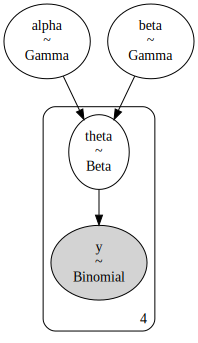

In [27]:
trial.visualise_model(analysis_name)

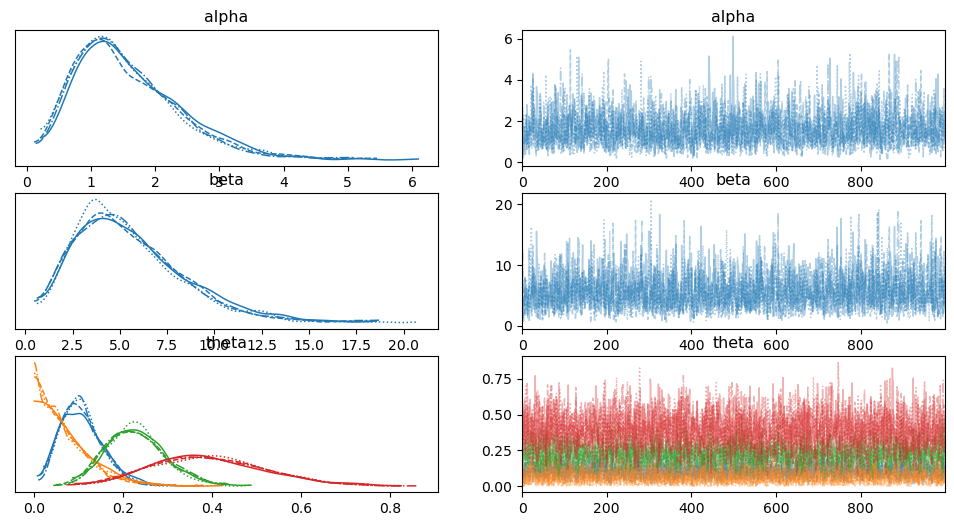

In [28]:
trial.plot_trace(analysis_name, -1)

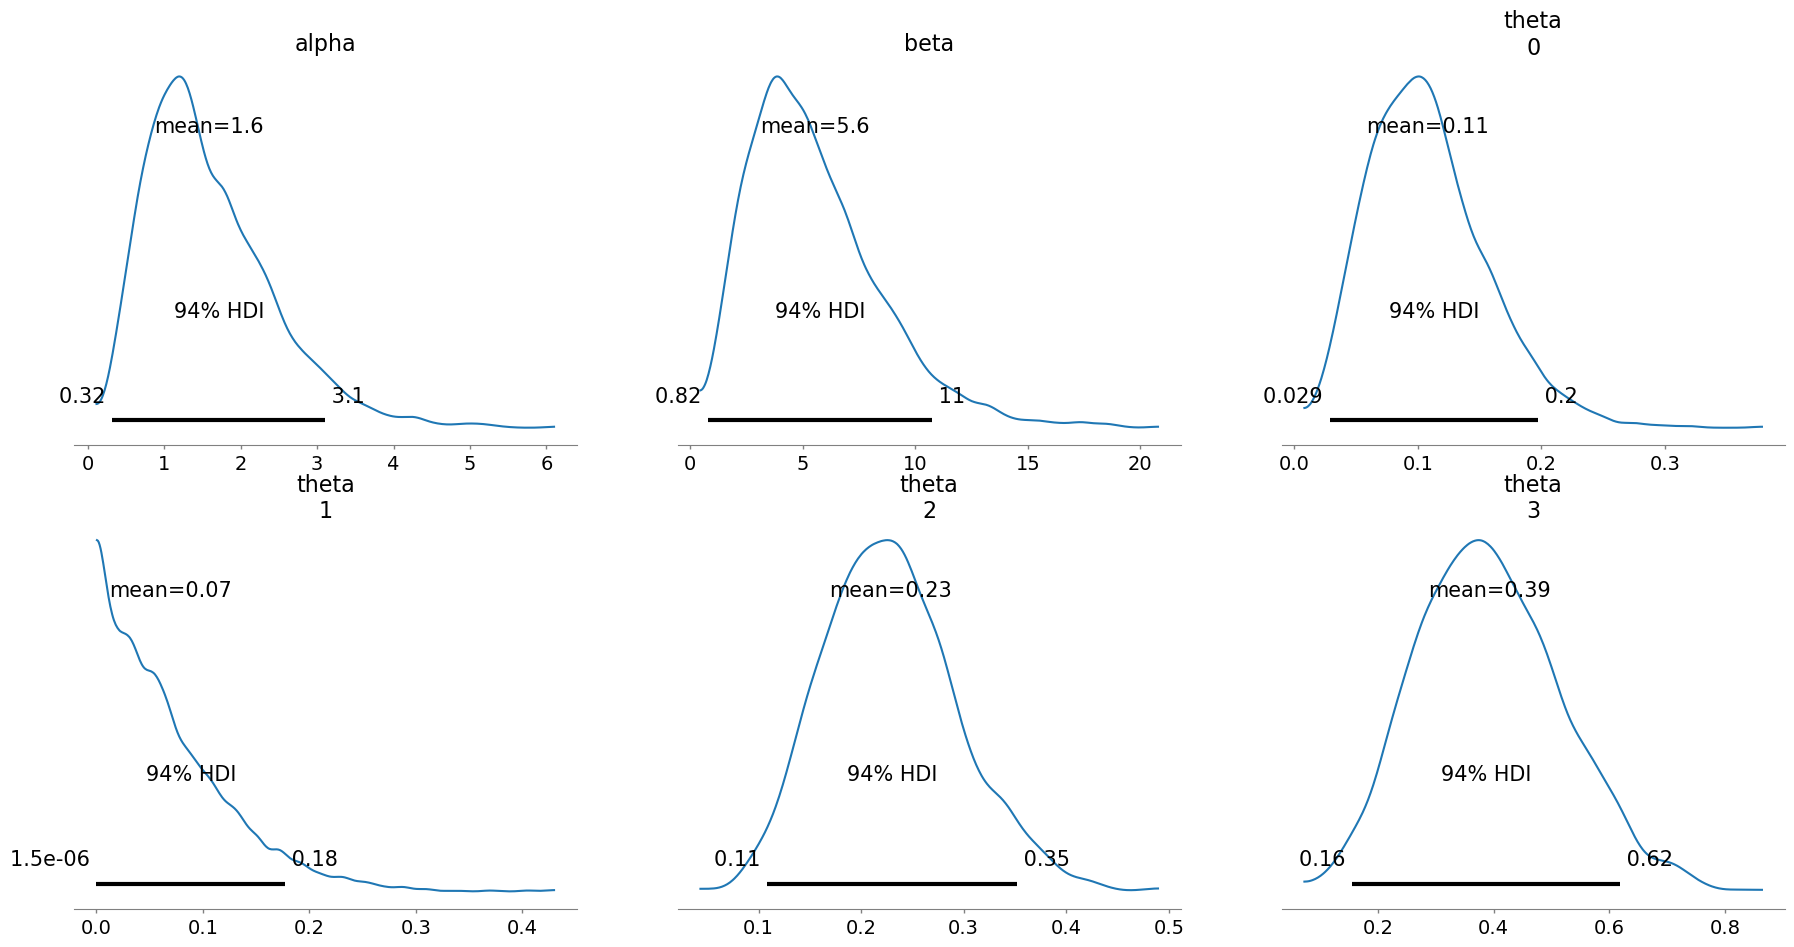

In [29]:
trial.plot_posterior(analysis_name, -1)

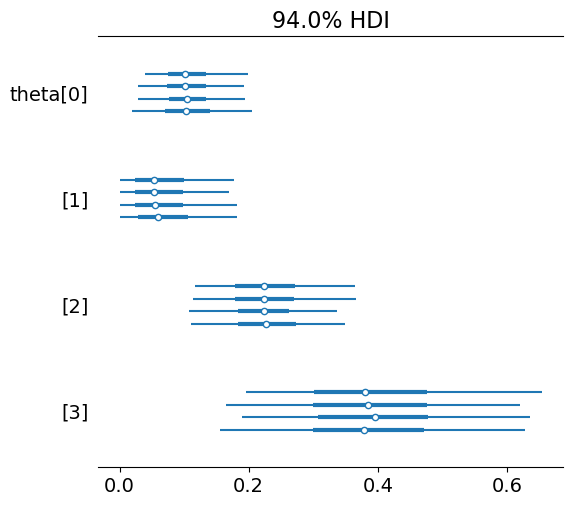

In [30]:
trial.plot_forest(analysis_name, -1)

In [31]:
trial.final_report(analysis_name)

,status,nnz,total
k,,,
0,COMPLETED_INEFFECTIVE,3,35
1,EARLY_STOP_FUTILE,0,15
2,COMPLETED_EFFECTIVE,8,35
3,EARLY_STOP_EFFECTIVE,5,10


### BHM

In [32]:
analysis_name = analysis_names[1]
analysis_name

'bhm'

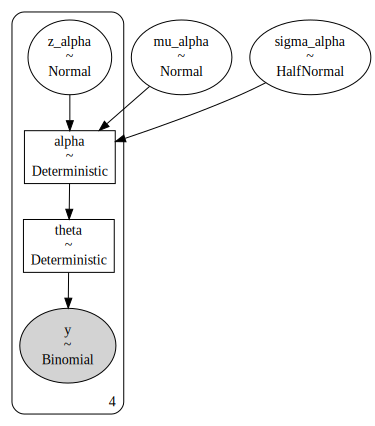

In [33]:
trial.visualise_model(analysis_name)

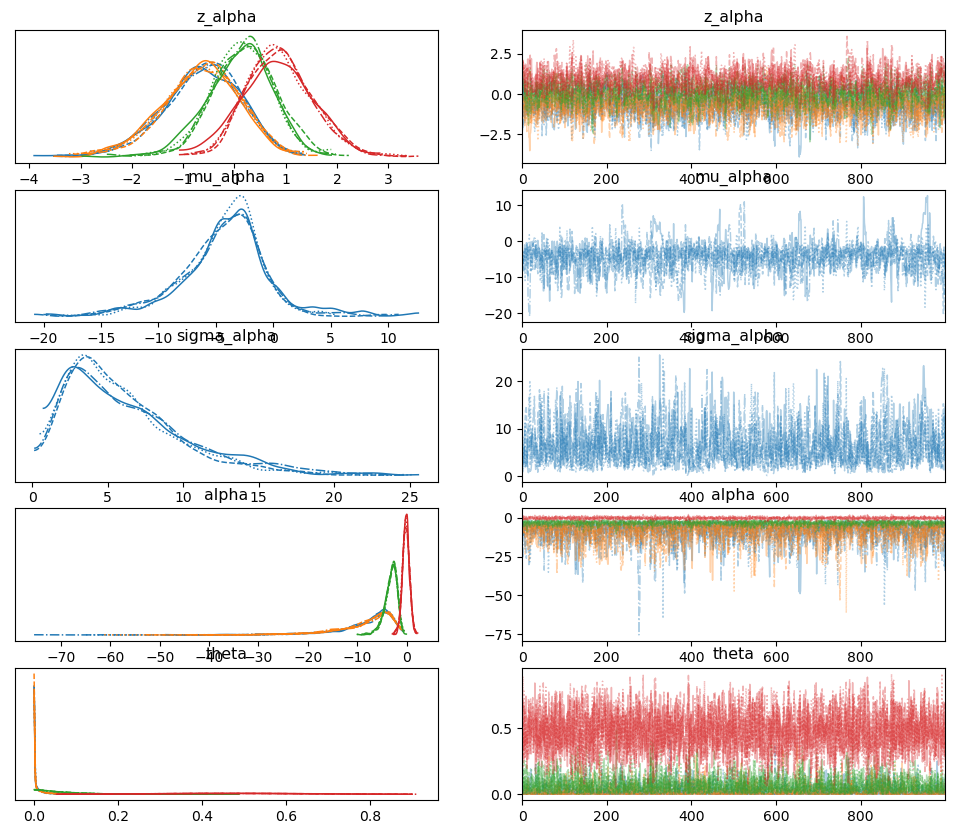

In [34]:
trial.plot_trace(analysis_name, -1)

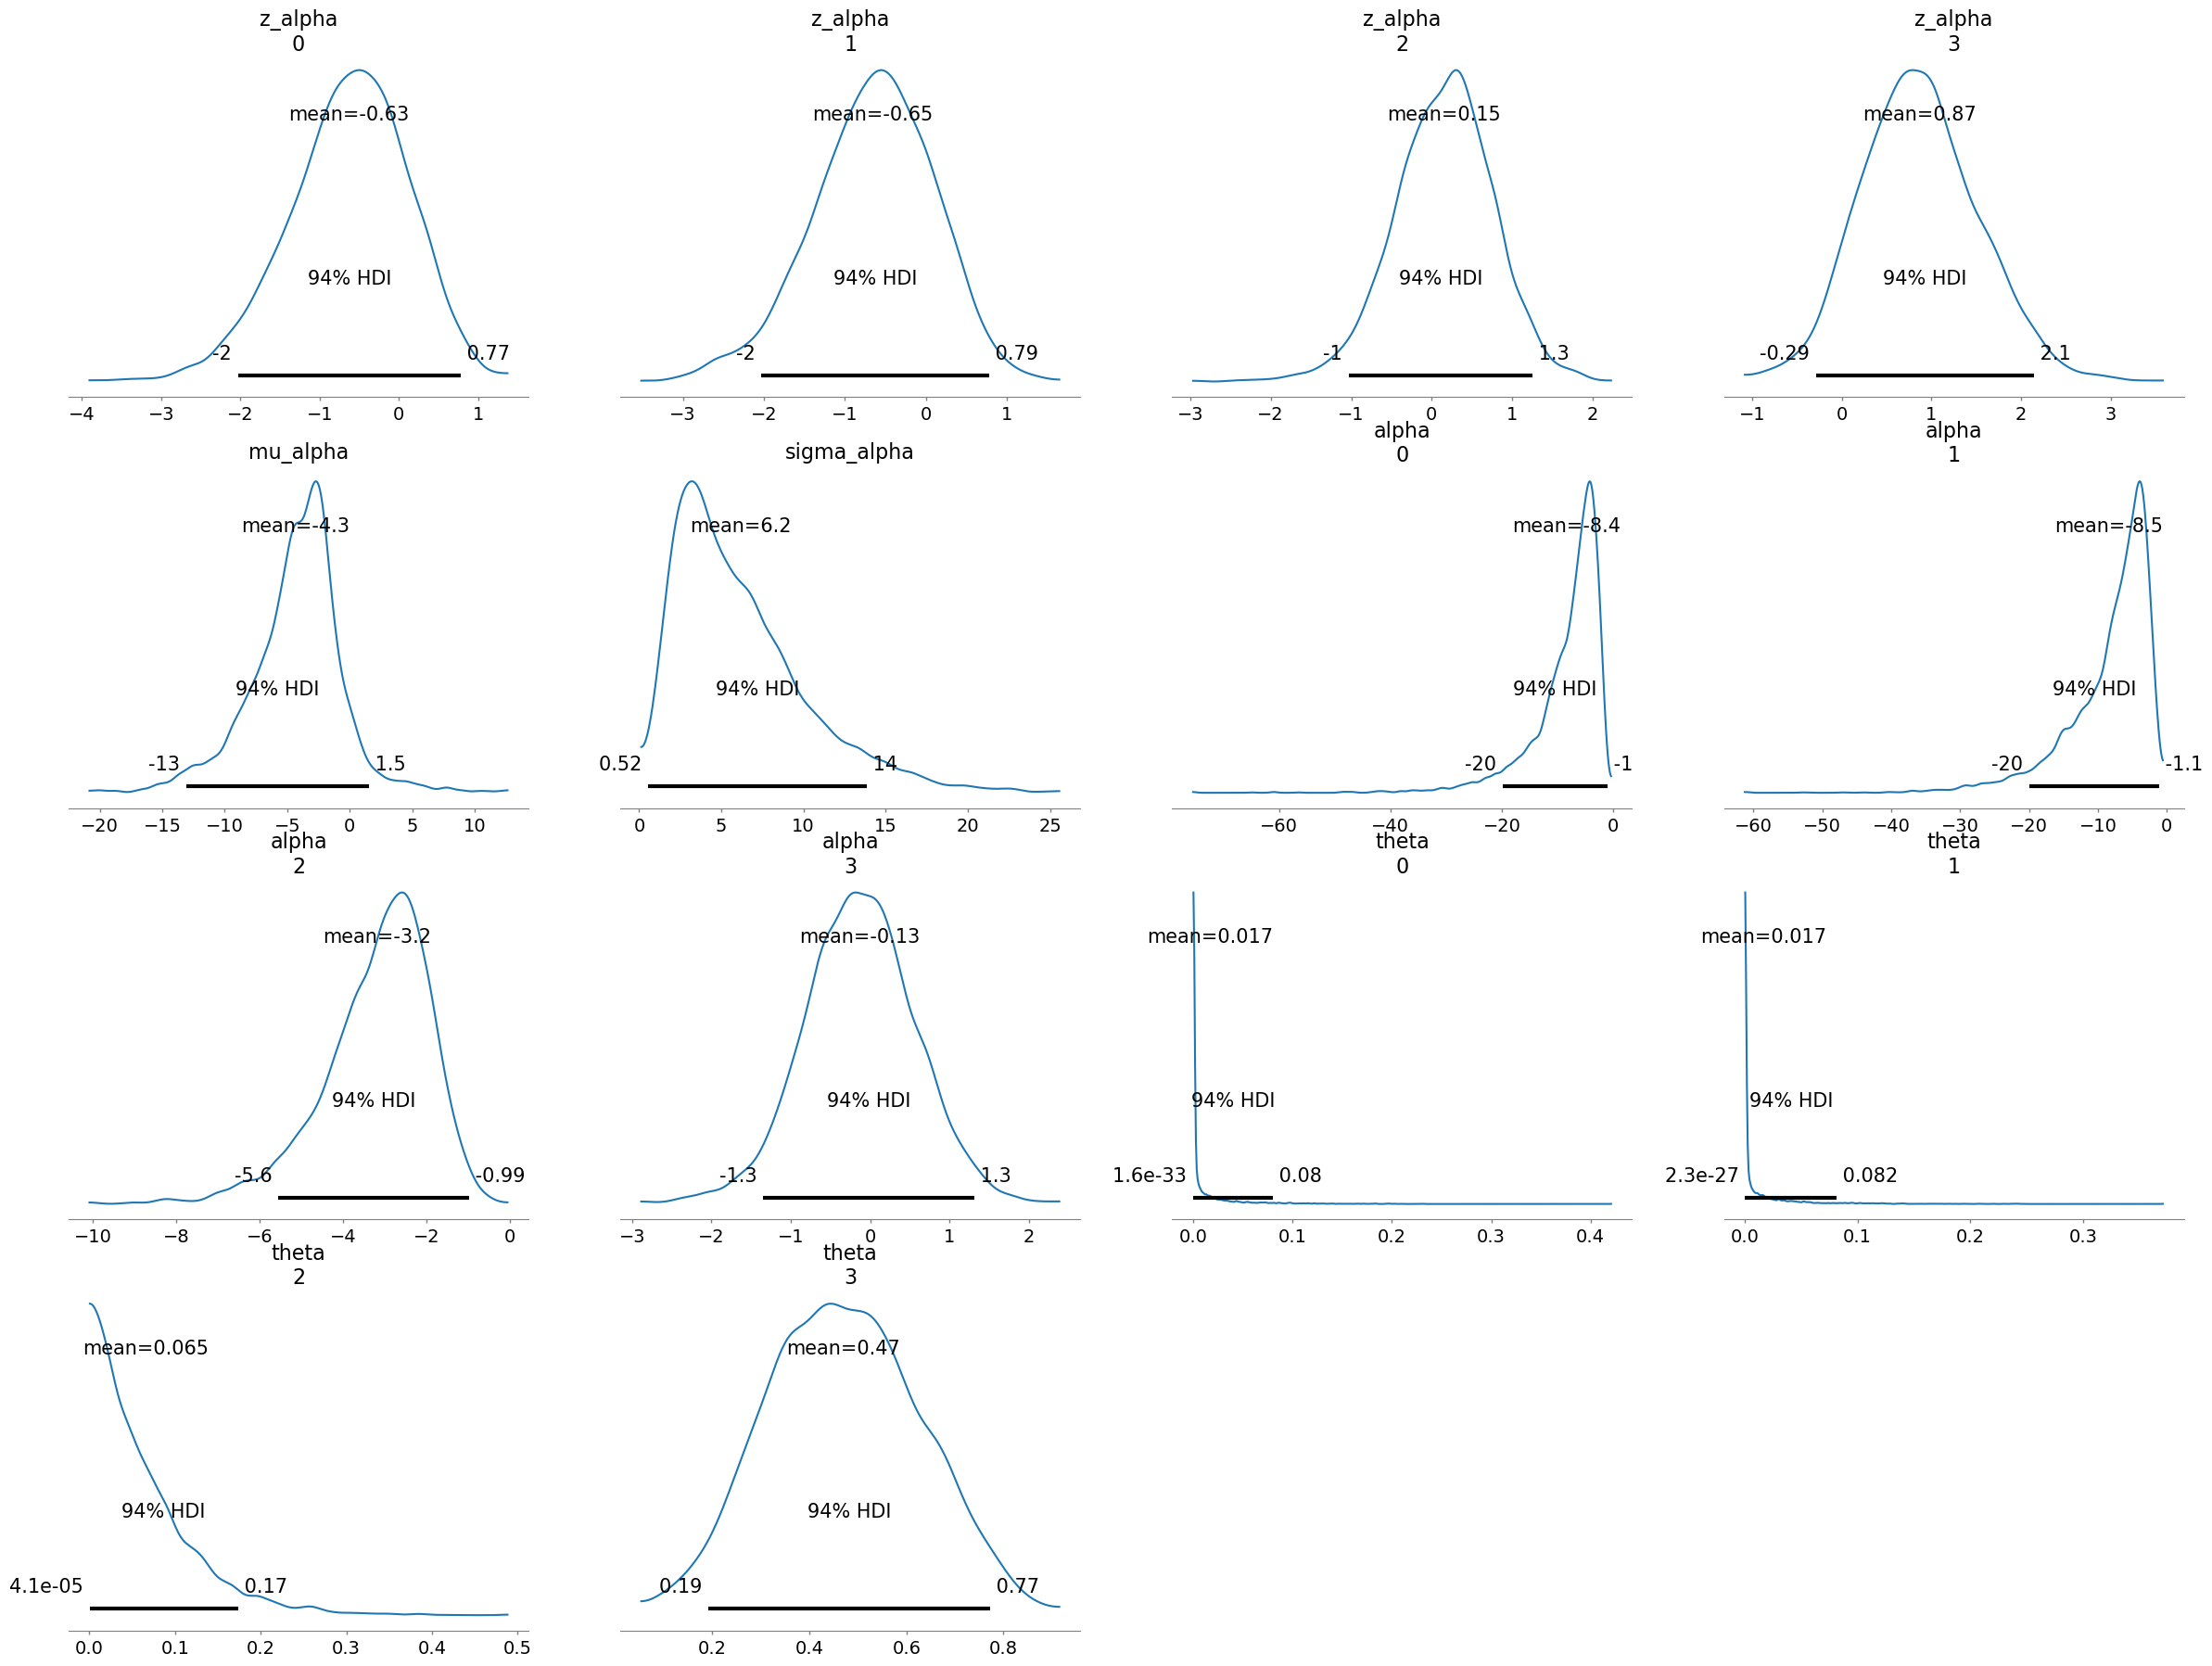

In [35]:
trial.plot_posterior(analysis_name, -1)

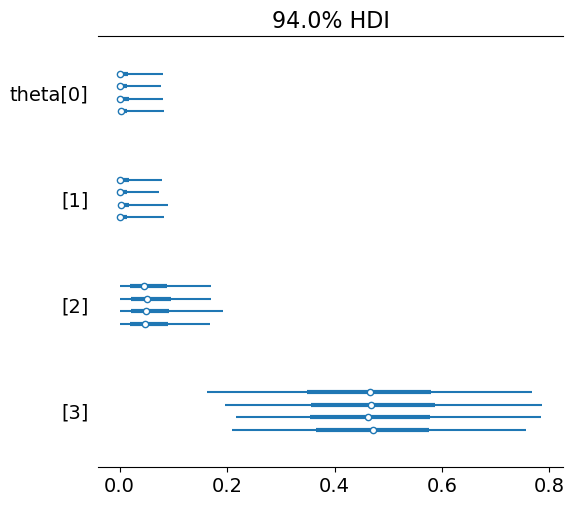

In [36]:
trial.plot_forest(analysis_name, -1)

In [37]:
trial.final_report(analysis_name)

,status,nnz,total
k,,,
0,EARLY_STOP_FUTILE,0,10
1,EARLY_STOP_FUTILE,0,10
2,EARLY_STOP_FUTILE,1,15
3,EARLY_STOP_EFFECTIVE,5,10
